In [1]:
#Uncomment below lines to install required packages

# !pip install matplotlib
# !pip install scikit-learn 
# !pip install numpy

### Importing all necessary packages

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### Creating data

In [3]:
# Create vector x
x = np.random.normal(0, 1, size=5000)

# Create vector eps
eps = np.random.normal(0, np.sqrt(0.25), size=5000)

# Create vector y
y = -1 + 0.5*x - 2*x**2 + 0.3*x**3 + eps

#Reshape x
x = x.reshape(-1,1)

### Visualizing data

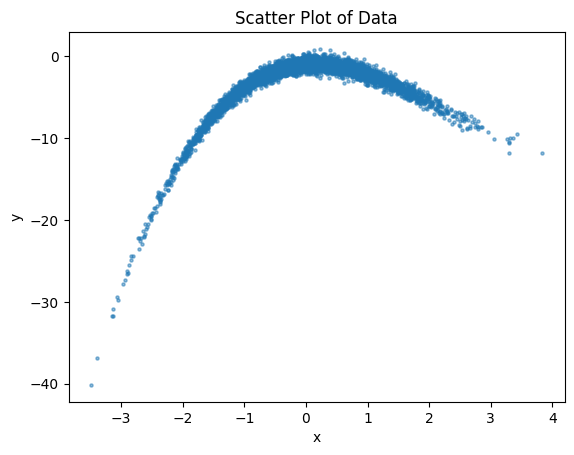

In [4]:
# Scatter plot of the data
plt.scatter(x, y, s=5, alpha=0.5, label='Data Points')

# Set plot labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Data')

# Display the plot
plt.show()

### Applying linear regression on all data without cross validation

In [5]:
# Create Linear Regression object
lr = LinearRegression()

# Fit the model on the training data
lr.fit(x, y)

# Get the predicted target variable
y_pred = lr.predict(x)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)

# Get the intercept and weight
intercept = lr.intercept_
weight = lr.coef_

print("Coefficient of x (weight):", weight)
print("Intercept:", intercept)

Mean Squared Error: 8.844749521787975
Coefficient of x (weight): [1.43031179]
Intercept: -3.0020452617736098


### Applying linear regression on all data with cross validation

In [6]:
# Create Linear Regression object
lr = LinearRegression()

# Apply k-fold cross-validation with 10 folds
scores = cross_val_score(lr, x, y, scoring='neg_mean_squared_error', cv=10)

# Convert the negative mean squared errors to positive
mse_scores = -scores

print("Mean Squared Error:", mse_scores)
print("Mean Squared Error (Average):", mse_scores.mean())

# Fit the model on the training data
lr.fit(x, y)

# Get the intercept and weight
intercept = lr.intercept_
weight = lr.coef_[0]

print("Coefficient of x (weight):", weight)
print("Intercept:", intercept)

Mean Squared Error: [ 7.49934424  9.57666906  6.76476233 10.79176893  6.78582239  9.11170957
  9.15761867 10.70371697  7.71263772 10.4956839 ]
Mean Squared Error (Average): 8.859973376309298
Coefficient of x (weight): 1.4303117929763975
Intercept: -3.0020452617736098


### Splitting data into training set (75%) and test set (25%)

In [7]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print("Number of records in training set: ", x_train.shape[0])
print("Number of records in training set: ", x_test.shape[0])

Number of records in training set:  3750
Number of records in training set:  1250


### Applying linear regression without cross-validation on training set and calculating MSE on test set.

In [8]:
# Define a range of polynomial degrees to test
degrees = range(1, 11)

# Initialize variables to store the best degree and best mean squared error
best_degree = None
best_mse = float('inf')

scores = []
for degree in degrees:
    # Create pipeline for polynomial features and linear regression
    pipe = Pipeline([
        ('poly', PolynomialFeatures()),
        ('lr', LinearRegression())
    ])
    pipe.set_params(poly__degree=degree)
    
    # Fit the model on the training data
    pipe.fit(x_train, y_train)

    # Predict the target variable for the test data
    y_pred = pipe.predict(x_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Append the scores
    scores.append(mse)

# Find the degree with the minimum MSE
best_degree = degrees[np.argmin(scores)]

print("Mean Squared Errors For All Iterations:", scores)
print("Best MSE:", scores[best_degree-1])
print("Best degree of polynomial:", best_degree)

Mean Squared Errors For All Iterations: [7.722892755025049, 0.642745952286897, 0.2613752927918514, 0.26141366800792487, 0.2614861933823593, 0.26143617772905037, 0.26158073939001725, 0.2617328697520028, 0.2617084353291443, 0.2615002866927923]
Best MSE: 0.2613752927918514
Best degree of polynomial: 3


In [9]:
# Fit the pipeline on the training data, using the best degree of the polynomial
pipe.set_params(poly__degree=best_degree)
pipe.fit(x_train, y_train)
# Extract the coefficients of the linear regression model
coefs = pipe.named_steps['lr'].coef_
true_coefs = [-1, 0.5, -2, 0.3]
# Compare the coefficients to the true values
print("Coefficient of x^0 i.e. w0: : {} (true value: {})".format(pipe.named_steps['lr'].intercept_, true_coefs[0]))
print("Coefficient of x^1 i.e. w1: : {} (true value: {})".format(coefs[1], true_coefs[1]))
print("Coefficient of x^2 i.e. w2: : {} (true value: {})".format(coefs[2], true_coefs[2]))
print("Coefficient of x^3 i.e. w3: : {} (true value: {})".format(coefs[3], true_coefs[3]))

Coefficient of x^0 i.e. w0: : -0.9850529470031639 (true value: -1)
Coefficient of x^1 i.e. w1: : 0.4950562048456799 (true value: 0.5)
Coefficient of x^2 i.e. w2: : -1.997883720489212 (true value: -2)
Coefficient of x^3 i.e. w3: : 0.2990448779967233 (true value: 0.3)


### Plotting MSE score for all degrees

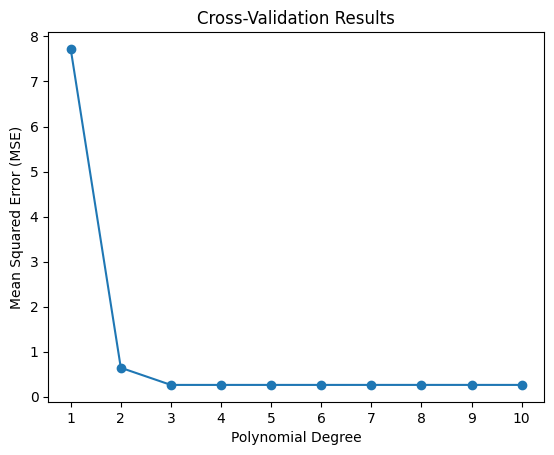

In [10]:
#Plotting
plt.plot(degrees, scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-Validation Results')
plt.xticks(degrees)
plt.show()

### Applying linear regression with cross-validation on training set and calculating MSE on test set.

In [11]:
# Define a range of polynomial degrees to test
degrees = range(1, 11)

# Perform 10-fold cross-validation for each degree of the polynomial
cv_scores = []
for degree in degrees:
    # Create pipeline for polynomial features and linear regression
    pipe = Pipeline([
        ('poly', PolynomialFeatures()),
        ('lr', LinearRegression())
    ])
    pipe.set_params(poly__degree=degree)
    pipe.set_params(poly__degree=degree)
    scores = cross_val_score(pipe, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(-scores))


# Find the degree with the minimum MSE
best_degree = degrees[np.argmin(cv_scores)]

print("Mean Squared Errors For All Iterations:", cv_scores)
print("Best MSE:", cv_scores[best_degree-1])
print("Best degree of polynomial:", best_degree)

Mean Squared Errors For All Iterations: [9.259740380845264, 0.8757286420179572, 0.24725856624277592, 0.24731743362959713, 0.24743076741838993, 0.2475668940142021, 0.2480348563698626, 0.24859732675760662, 0.25727279412532034, 0.27113083049636466]
Best MSE: 0.24725856624277592
Best degree of polynomial: 3


In [12]:
# Fit the pipeline on the training data, using the best degree of the polynomial
pipe.set_params(poly__degree=best_degree)
pipe.fit(x_train, y_train)
# Extract the coefficients of the linear regression model
coefs = pipe.named_steps['lr'].coef_
true_coefs = [-1, 0.5, -2, 0.3]
# Compare the coefficients to the true values
print("Coefficient of x^0 i.e. w0: : {} (true value: {})".format(pipe.named_steps['lr'].
                                                                 intercept_, true_coefs[0]))
print("Coefficient of x^1 i.e. w1: : {} (true value: {})".format(coefs[1], true_coefs[1]))
print("Coefficient of x^2 i.e. w2: : {} (true value: {})".format(coefs[2], true_coefs[2]))
print("Coefficient of x^3 i.e. w3: : {} (true value: {})".format(coefs[3], true_coefs[3]))

Coefficient of x^0 i.e. w0: : -0.9850529470031639 (true value: -1)
Coefficient of x^1 i.e. w1: : 0.4950562048456799 (true value: 0.5)
Coefficient of x^2 i.e. w2: : -1.997883720489212 (true value: -2)
Coefficient of x^3 i.e. w3: : 0.2990448779967233 (true value: 0.3)


### Plotting MSE score for all degrees

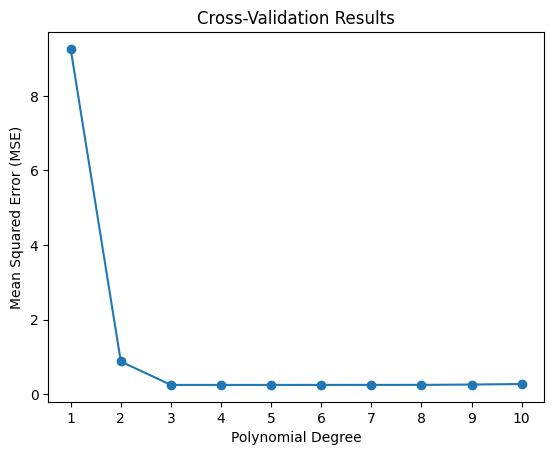

In [13]:
#Plotting
plt.plot(degrees, cv_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-Validation Results')
plt.xticks(degrees)
plt.show()